In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Question 1
dataset=pd.read_csv('C:\\Neville\\Python\\Session\\Module 6\\cereal.csv')

In [4]:
dataset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


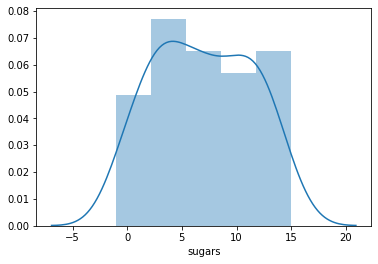

In [11]:
sns.distplot(dataset['sugars'])
plt.show()

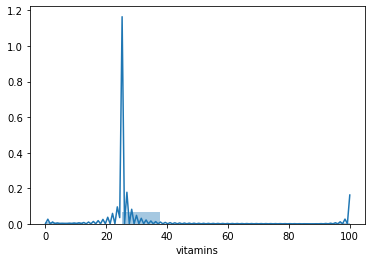

In [13]:
sns.distplot(dataset['vitamins'])
plt.show()

In [18]:
#Question 2
manufacturer_dict={'mfr':['N','Q','K','R','G','P','A'],'mfr_name':['Nabisco','Quaker Oats','Kellogs','Raslston Purina','General Mills','Post','American Home Foods Products']}

In [19]:
manufacturer_dict

{'mfr': ['N', 'Q', 'K', 'R', 'G', 'P', 'A'],
 'mfr_name': ['Nabisco',
  'Quaker Oats',
  'Kellogs',
  'Raslston Purina',
  'General Mills',
  'Post',
  'American Home Foods Products']}

In [23]:
dataset_manuf=pd.DataFrame(manufacturer_dict)

In [26]:
dataset=pd.merge(dataset,dataset_manuf,on='mfr')

In [28]:
dataset.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_name
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Nabisco
1,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816,Nabisco
2,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885,Nabisco
3,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949,Nabisco
4,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787,Nabisco


In [86]:
data_subset=dataset.groupby(['mfr_name']).size().reset_index()

In [87]:
data_subset

,mfr_name,0
0,American Home Foods Products,1
1,General Mills,22
2,Kellogs,23
3,Nabisco,6
4,Post,9
5,Quaker Oats,8
6,Raslston Purina,8


In [88]:
data_subset.columns=['mfr_name','total']

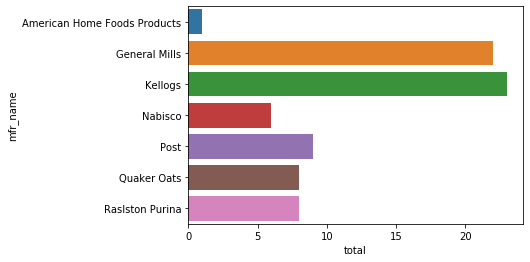

In [92]:
sns.barplot(data=data_subset,x='total',y='mfr_name')

In [59]:
dataset.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_name
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Nabisco
1,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816,Nabisco
2,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885,Nabisco
3,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949,Nabisco
4,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787,Nabisco


In [66]:
#Question 3
x=dataset.iloc[:,3:15].values

In [65]:
y=dataset.iloc[:,15:16].values

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [69]:
#Question 4
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_pred=model.predict(x_test)

In [73]:
y_test

array([[36.176196],
       [53.131324],
       [34.139765],
       [28.025765],
       [53.371007],
       [37.136863],
       [68.402973],
       [41.50354 ],
       [32.207582],
       [59.363993],
       [37.840594],
       [49.511874],
       [49.120253],
       [40.105965],
       [68.235885],
       [39.106174],
       [58.345141],
       [21.871292],
       [31.230054],
       [72.801787]])

In [74]:
y_pred

array([[36.17619621],
       [53.13132339],
       [34.13976426],
       [28.02576464],
       [53.37100725],
       [37.13686291],
       [68.40297279],
       [41.50353997],
       [32.20758146],
       [59.36399353],
       [37.84059396],
       [49.51187427],
       [49.12025289],
       [40.10596493],
       [68.23588487],
       [39.10617423],
       [58.34514146],
       [21.87129222],
       [31.23005441],
       [72.80178704]])

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9999999999999994